In [1]:
"""
Опис ознак датасету 'bike':

- instant: індекс запису в датасеті
- dteday: дата запису
- season: сезон (1: зима, 2: весна, 3: літо, 4: осінь)
- yr: рік (0: 2011, 1: 2012)
- mnth: місяць (1-12)
- hr: година доби (0-23)
- holiday: чи є день святковим (0: ні, 1: так)
- weekday: день тижня (0-6, де 0 - неділя)
- workingday: чи є день робочим (0: вихідний або свято, 1: робочий день)
- weathersit: погодна ситуація
  * 1: ясно, мало хмар
  * 2: туман, невеликі хмари
  * 3: легкий сніг, легкий дощ, гроза з розсіяними хмарами
  * 4: сильний дощ, град, гроза з великою хмарністю
- temp: нормалізована температура в Цельсіях (значення / 41)
- atemp: нормалізована температура "відчувається як" (значення / 50)
- hum: нормалізована вологість (значення / 100)
- windspeed: нормалізована швидкість вітру (значення / 67)
- cnt: загальна кількість орендованих велосипедів (включаючи як звичайних, так і зареєстрованих користувачів)
"""

'\nОпис ознак датасету \'bike\':\n\n- instant: індекс запису в датасеті\n- dteday: дата запису\n- season: сезон (1: зима, 2: весна, 3: літо, 4: осінь)\n- yr: рік (0: 2011, 1: 2012)\n- mnth: місяць (1-12)\n- hr: година доби (0-23)\n- holiday: чи є день святковим (0: ні, 1: так)\n- weekday: день тижня (0-6, де 0 - неділя)\n- workingday: чи є день робочим (0: вихідний або свято, 1: робочий день)\n- weathersit: погодна ситуація\n  * 1: ясно, мало хмар\n  * 2: туман, невеликі хмари\n  * 3: легкий сніг, легкий дощ, гроза з розсіяними хмарами\n  * 4: сильний дощ, град, гроза з великою хмарністю\n- temp: нормалізована температура в Цельсіях (значення / 41)\n- atemp: нормалізована температура "відчувається як" (значення / 50)\n- hum: нормалізована вологість (значення / 100)\n- windspeed: нормалізована швидкість вітру (значення / 67)\n- cnt: загальна кількість орендованих велосипедів (включаючи як звичайних, так і зареєстрованих користувачів)\n'

In [2]:
from pycaret.datasets import get_data

In [3]:
"""
Для цього датасету було обрано регресію через те, що доцільно для нього було б прогнозувати точну кількість орендованих
велосипедів (змінна 'cnt'), яка є числом,
бо між погодними умовами, часом доби та кількістю орендованих велосипедів існує числова залежність.
"""

"\nДля цього датасету було обрано регресію через те, що доцільно для нього було б прогнозувати точну кількість орендованих\nвелосипедів (змінна 'cnt'), яка є числом,\nбо між погодними умовами, часом доби та кількістю орендованих велосипедів існує числова залежність.\n"

In [4]:
from pycaret import regression

In [5]:
# Завантаження датасету
bike_data = get_data('bike')
print(bike_data.info())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 2.0+ MB
None


<Axes: >

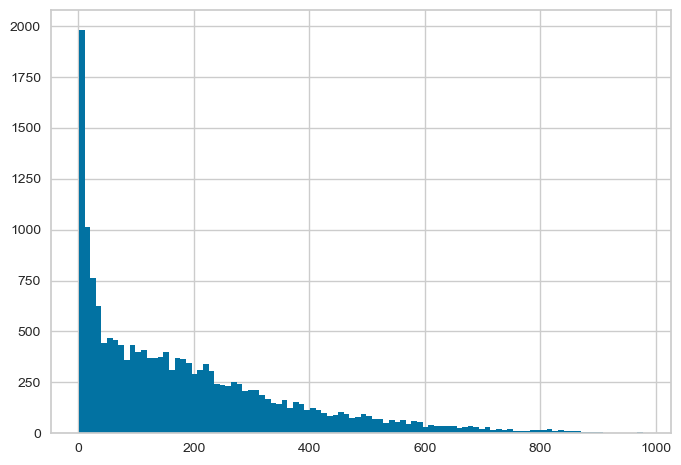

In [6]:
# Візуалізація розподілу цільової змінної
bike_data.cnt.hist(bins=100)

In [7]:
# Підготовка даних
s = regression.setup(bike_data,
                    target = 'cnt',
                    numeric_features = ['temp', 'atemp', 'hum', 'windspeed'],
                    categorical_features = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit'],
                    ignore_features = ['instant', 'dteday'],
                    normalize = True,
                    session_id = 123)

,Description,Value
0,Session id,123
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(17379, 15)"
4,Transformed data shape,"(17379, 59)"
5,Transformed train set shape,"(12165, 59)"
6,Transformed test set shape,"(5214, 59)"
7,Ignore features,2
8,Numeric features,4
9,Categorical features,8


In [8]:
# Перевірка перетворених даних
regression.get_config('X_train')

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
1859,2,0,3,6,0,3,1,2,0.34,0.3182,0.87,0.2537
7302,4,0,11,21,0,6,0,1,0.32,0.3485,0.66,0.0000
17094,4,1,12,1,0,4,1,1,0.32,0.3485,0.66,0.0000
17009,4,1,12,12,0,0,0,2,0.38,0.3939,0.82,0.1940
1636,1,0,3,17,0,0,0,1,0.44,0.4394,0.41,0.3582
...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,1,5,0,3,1,1,0.22,0.2273,0.47,0.1642
13435,3,1,7,0,0,4,1,1,0.74,0.6970,0.66,0.0896
7763,4,0,11,2,0,5,1,1,0.28,0.2879,0.81,0.1045
15377,4,1,10,22,0,0,0,1,0.38,0.3939,0.87,0.1343


In [9]:
# Порівняння моделей
best = regression.compare_models(sort='MAE')
print(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,28.3325,2289.4824,47.6539,0.9298,0.3968,0.3901,1.3610
lightgbm,Light Gradient Boosting Machine,31.8388,2300.7627,47.8997,0.9296,0.5453,0.6599,0.2410
rf,Random Forest Regressor,33.1274,2793.7904,52.7593,0.9145,0.4857,0.5691,1.2710
dt,Decision Tree Regressor,44.3468,5743.9342,75.5536,0.8242,0.5840,0.6021,0.1120
knn,K Neighbors Regressor,51.7037,6207.9244,78.7214,0.8096,0.4978,0.5520,0.1500
gbr,Gradient Boosting Regressor,59.4645,6796.0909,82.3773,0.7917,0.8147,1.5180,0.3520
huber,Huber Regressor,72.1414,10753.6702,103.6582,0.6705,0.9722,2.4535,0.2550
lasso,Lasso Regression,74.8733,10336.4093,101.6348,0.6832,1.0217,2.7856,0.3930
llar,Lasso Least Angle Regression,74.8734,10336.4516,101.6350,0.6832,1.0217,2.7856,0.1020
br,Bayesian Ridge,75.1941,10299.3528,101.4522,0.6843,1.0320,2.8862,0.1160


ExtraTreesRegressor(n_jobs=-1, random_state=123)


In [10]:
# Створення окремої моделі
dt = regression.create_model('dt')
print(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,46.7239,6388.9885,79.9311,0.7961,0.6539,0.8957
1,44.9334,6030.0608,77.6535,0.8191,0.6058,0.6421
2,45.4601,6108.3509,78.1559,0.8172,0.5943,0.6509
3,44.0789,5867.9819,76.6028,0.8231,0.5611,0.5235
4,38.3426,3637.8085,60.3142,0.8769,0.5176,0.4758
5,45.0271,5555.3265,74.5341,0.8271,0.5616,0.5133
6,48.0625,6862.0197,82.8373,0.7958,0.5998,0.6844
7,41.6776,4922.1003,70.1577,0.8604,0.5752,0.5770
8,44.7442,6020.5156,77.5920,0.8108,0.5841,0.5574


DecisionTreeRegressor(random_state=123)


In [11]:
# Налаштування гіперпараметрів
tuned_dt = regression.tune_model(dt, optimize='rmse')
print(tuned_dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,73.7569,10708.3351,103.4811,0.6583,1.0279,2.5770
1,65.2483,8504.7546,92.2212,0.7449,1.0461,2.7082
2,70.6891,9651.1380,98.2402,0.7111,1.0846,2.8689
3,73.2860,10754.5451,103.7041,0.6758,0.9904,2.2943
4,67.4467,8929.0062,94.4934,0.6979,1.0571,2.8522
5,64.0919,8088.1675,89.9342,0.7482,0.9692,2.3233
6,72.9186,11067.8364,105.2038,0.6707,1.0789,2.8419
7,66.6832,8876.2951,94.2141,0.7482,1.1099,3.0481
8,67.7934,9261.9767,96.2392,0.7090,1.0413,2.5717


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
DecisionTreeRegressor(random_state=123)


In [12]:
# Ансамбль моделей
bagged_tuned_dt = regression.ensemble_model(tuned_dt, optimize='rmse')
print(bagged_tuned_dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,36.3202,3358.9820,57.9567,0.8928,0.5207,0.6869
1,34.8641,3038.6292,55.1238,0.9089,0.4953,0.6201
2,36.4933,3308.6437,57.5208,0.9010,0.5278,0.6700
3,35.3383,3300.4555,57.4496,0.9005,0.4727,0.5733
4,31.4513,2373.6644,48.7203,0.9197,0.4746,0.5322
5,34.7524,3082.8970,55.5238,0.9040,0.4757,0.4978
6,37.8983,3743.3652,61.1830,0.8886,0.5391,0.6603
7,34.1161,3030.1066,55.0464,0.9140,0.5097,0.5777
8,35.2734,3405.8645,58.3598,0.8930,0.4663,0.4946


BaggingRegressor(estimator=DecisionTreeRegressor(random_state=123),
                 random_state=123)


In [13]:
# Аналіз моделі
regression.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

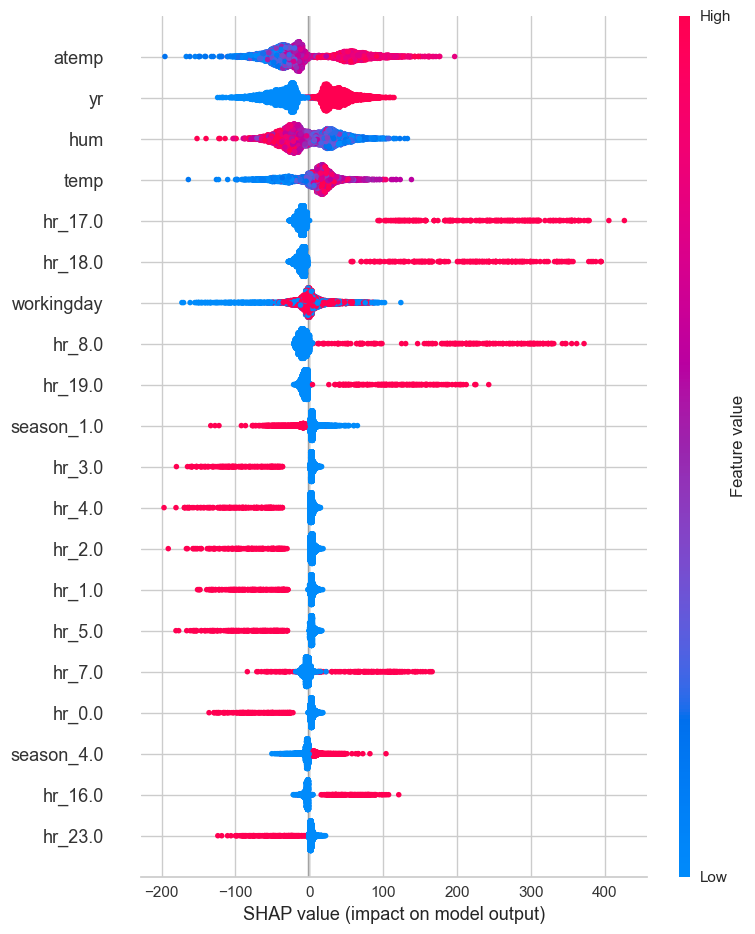

In [14]:
# Інтерпретація моделі
regression.interpret_model(dt)

In [15]:
# Прогнозування на тестовому наборі
pred_holdout = regression.predict_model(best)
pred_holdout.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,28.0301,2235.5564,47.2817,0.9331,0.3761,0.3662


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,prediction_label
5792,3,0,9,19,0,6,0,1,0.70,0.6667,0.74,0.1343,295,293.24
7823,4,0,11,14,0,0,0,1,0.62,0.6212,0.43,0.4627,313,420.54
15426,4,1,10,23,0,2,1,2,0.48,0.4697,0.77,0.0896,84,95.73
15028,4,1,9,9,0,0,0,1,0.50,0.4848,0.51,0.3284,276,305.10
12290,2,1,6,7,0,5,1,2,0.64,0.5758,0.89,0.1940,402,391.20


In [16]:
# Фіналізація моделі
best_final = regression.finalize_model(best)

In [17]:
# Збереження моделі
regression.save_model(best_final, 'bike-rental-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['temp', 'atemp', 'hum',
                                              'windspeed'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['season', 'yr', 'mnth', 'hr',
                                              'holiday', 'weekday', 'workingday',
                                              'weathersit'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_enco...
                 ('onehot_encoding',
                  TransformerWrapper(include=['season', 'mnth', 'hr', 'weekday',
                                              'weathersit'],
                                     transformer=OneHotEncoder(cols=['season',
                                                                     'mnth',
 